<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Final-Project/blob/main/CHL5230_Datathon_3_CHANGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

*   C CHANGE dataset
*   Visualizations

(976147, 70)
Index(['Patient_ID', 'Sex', 'Age', 'BirthYear', 'BMI', 'Obese', 'Height',
       'Weight', 'WaistCircumference', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL',
       'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'TC_Age_Sex', 'TC', 'TG', 'INR',
       'DM_HbA1c', 'DM_A1c<6.6', 'HBA1C', 'Any_AntiHTN', 'Any_AntiHTN-HTN',
       'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Antihypertensive_usage',
       'Statin_usage', 'DM_Statin', 'DM_ACE/ARB', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage',
       'Antihyper_Peripher_usage', 'Antihyperglycemics_usage', 'ASA_usage',
       'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx', 'Dyslipidemia_Hx',
       'BP>160_Macrovasc', 'MacroVasc', 'DM_Macrovasc', 'DM-sBP<130',
       'DM-dBP<80', 'MI_Hx', 

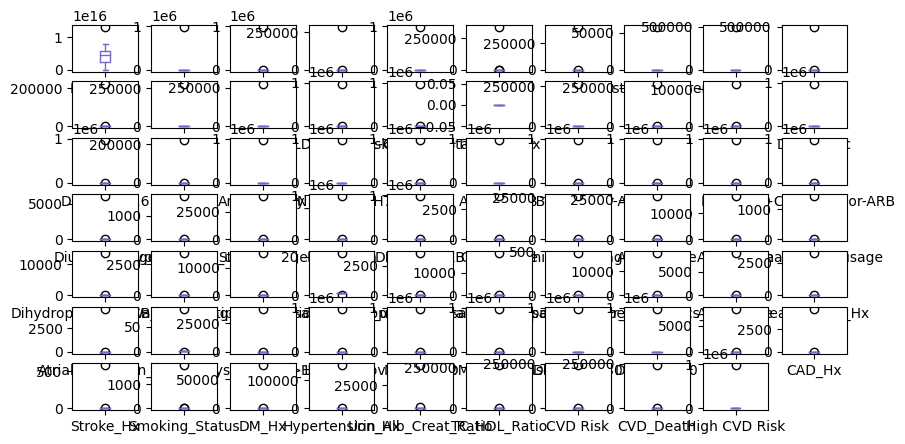

Patient_ID                   0
Sex                        775
Age                          0
BirthYear                    0
BMI                     695019
                         ...  
Urin_Alb_Creat_Ratio    928945
TC_HDL_Ratio            715426
CVD Risk                734730
CVD_Death               734730
High CVD Risk                0
Length: 70, dtype: int64
974320


sBP   dBP  FBS   HDL   LDL    TC    TG  Urin_Alb_Creat_Ratio  \
MacroVasc                                                                   
0          122.0  76.0  5.2  1.35  2.77  4.87  1.25                   1.3   
1          127.0  74.0  5.7  1.14  1.83  3.74  1.38                   2.1   

           TC_HDL_Ratio  
MacroVasc                
0                 3.495  
1                 3.250

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# read dataset
CHANGE_df = pd.read_excel('C-CHANGE Analysis Data v52c.xlsx')
CHANGE_df.head()

# check dimension of the dataset
print(CHANGE_df.shape)

# list the columns of the dataframe
print(CHANGE_df.columns)

# summary statistics
description = CHANGE_df.describe()
description
description.plot(kind='box', subplots=True, layout=(7, 10), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# check missing value
print(CHANGE_df.isnull().sum())

# exploration
CHANGE_df['High CVD Risk'].unique()
CHANGE_df['TC_Age_Sex'].unique() # completely NA
print(CHANGE_df['Antihypertensive_usage'].isnull().sum())

# check if MacroVasc is a combination of MI_Hx, CAD_Hx, Stroke_Hx
def MacroVasc_Hx(row):
    if row['MI_Hx']==1 or row['CAD_Hx']==1 or row['Stroke_Hx']==1:
        return 1
    else:
        return 0
df_temp = CHANGE_df
df_temp['MacroVasc_Hx'] = df_temp.apply(MacroVasc_Hx, axis=1)
sum((df_temp['MacroVasc']-df_temp['MacroVasc_Hx'])!=0)

# median age, BMI, Waist Circumference by group
CHANGE_df.groupby(['MacroVasc'])['Age','BMI','WaistCircumference'].median()

# median blood pressure, blood sugar, cholesterol etc by group
CHANGE_df.groupby(['MacroVasc'])['sBP','dBP','FBS','HDL','LDL','TC','TG','Urin_Alb_Creat_Ratio','TC_HDL_Ratio'].median()




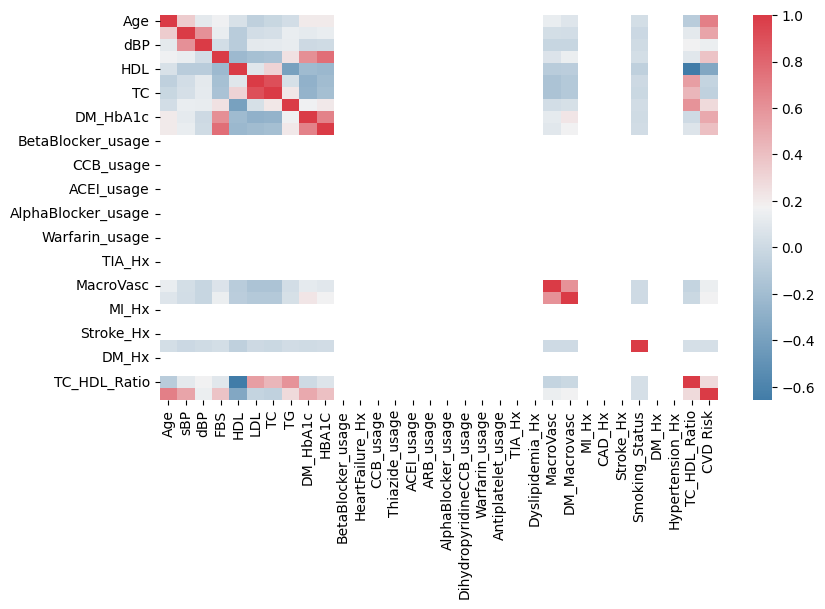

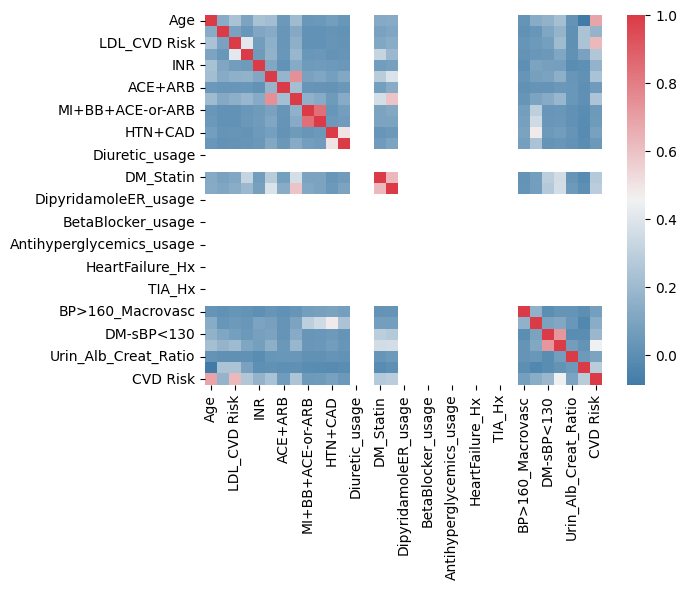

In [ ]:
########################################################### visualization

plt.figure(figsize=(9,5))

# correlation matrix between selected variables
CHANGE_corr_Fram = CHANGE_df[['Sex', 'Age', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL', 'TC', 'TG',
       'DM_HbA1c', 'HBA1C', 'BetaBlocker_usage', 'HeartFailure_Hx', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'TIA_Hx', 'Dyslipidemia_Hx', 'MacroVasc', 'DM_Macrovasc', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx',
       'Smoking_Status', 'DM_Hx', 'Hypertension_Hx', 'TC_HDL_Ratio', 'CVD Risk']]
CHANGE_corr_other = CHANGE_df[['Sex', 'Age', 'BMI', 'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'INR',
       'Any_AntiHTN-HTN', 'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Statin_usage', 'DM_Statin', 'DM_ACE/ARB',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage', 'Antihyper_Peripher_usage',
       'Antihyperglycemics_usage', 'ASA_usage', 'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx',
       'Dyslipidemia_Hx', 'BP>160_Macrovasc', 'MacroVasc',  'DM-sBP<130', 'DM-dBP<80',
       'Urin_Alb_Creat_Ratio', 'TC_HDL_Ratio', 'CVD Risk']]
Mcorr = CHANGE_corr_Fram.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

Mcorr = CHANGE_corr_other.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

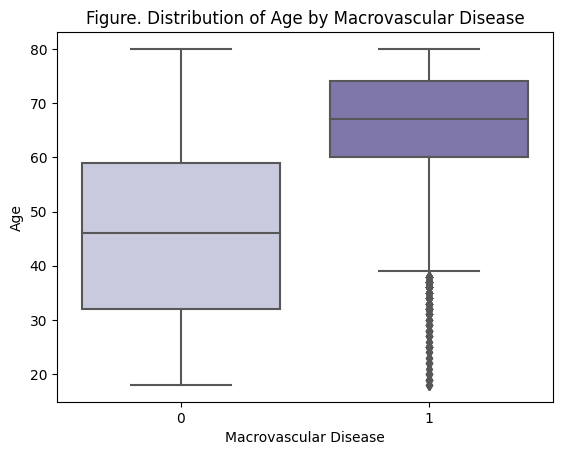

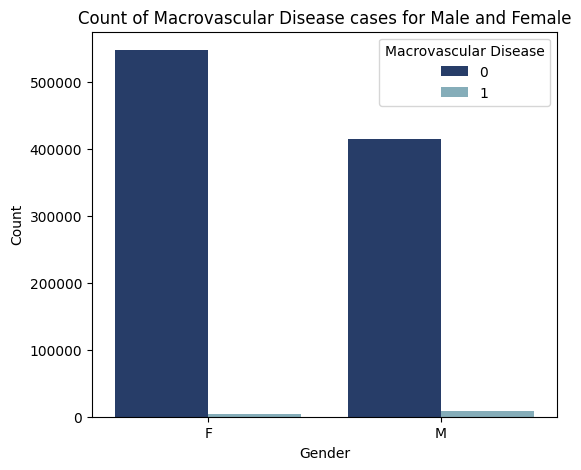

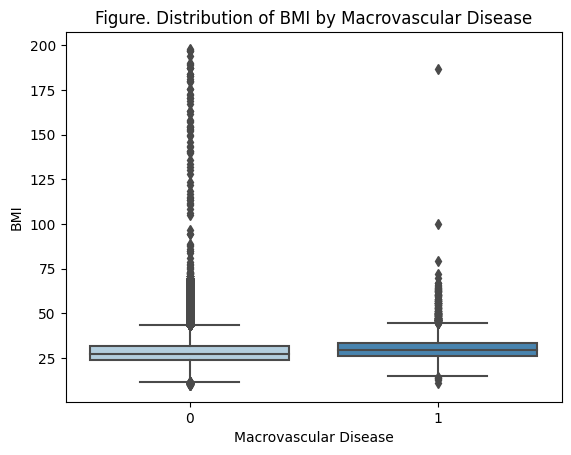

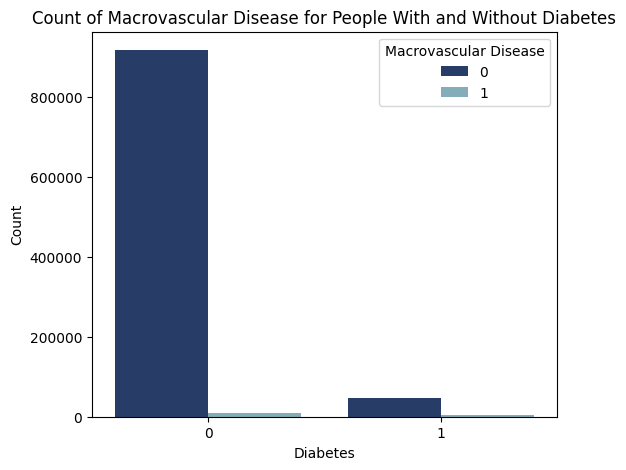

In [ ]:
# age
sns.boxplot( x=CHANGE_df['MacroVasc'], y=CHANGE_df['Age'], palette="Purples")
plt.title('Figure. Distribution of Age by Macrovascular Disease')
plt.xlabel('Macrovascular Disease')
plt.ylabel('Age')
plt.show()

# gender
# grouped bar chart using seaborn's countplot function
plt.figure(figsize=(6, 5))
sns.countplot(data=CHANGE_df, x='Sex', hue='MacroVasc', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Macrovascular Disease cases for Male and Female')
plt.legend(title='Macrovascular Disease')
plt.show()

# BMI
sns.boxplot( x=CHANGE_df['MacroVasc'], y=CHANGE_df['BMI'], palette="Blues")
plt.title('Figure. Distribution of BMI by Macrovascular Disease')
plt.xlabel('Macrovascular Disease')
plt.ylabel('BMI')
plt.show()

# diabetes
# grouped bar chart
plt.figure(figsize=(6, 5))
sns.countplot(data=CHANGE_df, x='DM_HbA1c', hue='MacroVasc', palette=['#1c3a73', '#7cb1c2'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Macrovascular Disease for People With and Without Diabetes')
plt.legend(title='Macrovascular Disease')
plt.show()


In [ ]:
# distribution of the class MacroVasc
import plotly.express as px
counts = CHANGE_df['MacroVasc'].value_counts()
# Define color sequence
colors = ['#1c3a73', '#7cb1c2']
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in Macrovascular Disease Column',
    color_discrete_sequence=colors  # apply colors
)
fig.show()

<Figure size 600x500 with 0 Axes>

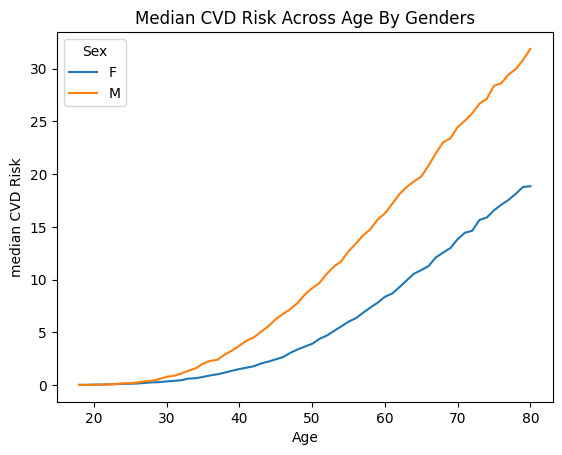

[Text(0.5, 1.0, 'Frequency Distribution of CVD Risk'),
 Text(0, 0.5, 'Frequency')]

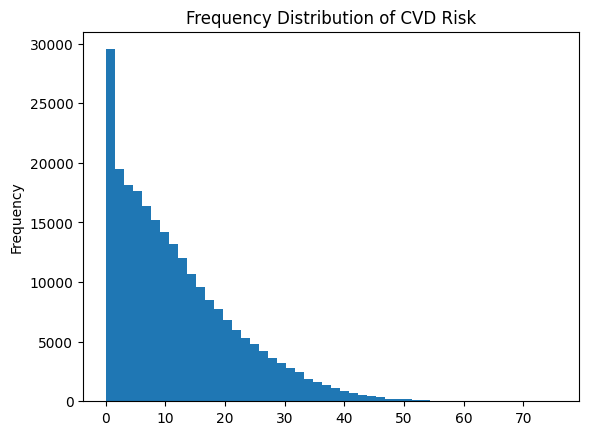

In [ ]:
# plot median CVD Risk over age by gender groups
# create pivot table
meian_CVDRisk = CHANGE_df.pivot_table(index='Age', columns='Sex', values='CVD Risk', aggfunc='median')
# plot
plt.figure(figsize=(6, 5))
meian_CVDRisk.plot(kind='line')
plt.ylabel('median CVD Risk')
plt.title('Median CVD Risk Across Age By Genders')
plt.show()

# distribution of CVD risk
plt.hist(CHANGE_df['CVD Risk'], bins=50)
plt.gca().set(title='Frequency Distribution of CVD Risk', ylabel='Frequency')

In [ ]:
# table one: baseline patient characteristics
!pip install tableone
from tableone import TableOne
T1_columns = ['Sex','Age','BMI','WaistCircumference','sBP','dBP','HDL','TC','TG','HBA1C',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx','CVD Risk','High CVD Risk']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status',
                  'High CVD Risk']
T1_group_by = ['MacroVasc']
Tableone = TableOne(data=CHANGE_df, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Tableone.tabulate(tablefmt = "fancy_grid"))

labels={'MacroVasc': 'MacroVascular Disease'}
# group by MacroVasc, 0 column: non MacroVasc disease, 1: has

#Tableone.to_excel('Tableone raw.xlsx')


╒═════════════════════════════════╤═════╤═══════════╤════════════════╤════════════════╤══════════════╤═══════════╕
│                                 │     │ Missing   │ Overall        │ 0              │ 1            │ P-Value   │
╞═════════════════════════════════╪═════╪═══════════╪════════════════╪════════════════╪══════════════╪═══════════╡
│ n                               │     │           │ 976147         │ 963556         │ 12591        │           │
├─────────────────────────────────┼─────┼───────────┼────────────────┼────────────────┼──────────────┼───────────┤
│ Sex, n (%)                      │ F   │ 775       │ 551530 (56.5)  │ 547755 (56.9)  │ 3775 (30.0)  │ <0.001    │
├─────────────────────────────────┼─────┼───────────┼────────────────┼────────────────┼──────────────┼───────────┤
│                                 │ M   │           │ 423842 (43.5)  │ 415026 (43.1)  │ 8816 (70.0)  │           │
├─────────────────────────────────┼─────┼───────────┼────────────────┼──────────


---
## Data Cleaning (Deal with N/A)

In [ ]:
########################################################## clean dataset
# Transform Sex column
CHANGE_df['Sex'].replace({'F' : 1, 'M' : 0}, inplace=True)

# selected variables are stored in dataframe CHANGE_selected
CHANGE_selected = CHANGE_df[['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','HBA1C',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','MacroVasc','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']]

# Dealing with Missing Value
# drop rows with NA in sex
CHANGE_selected = CHANGE_selected.dropna(subset=['Sex'])

# Imputation
# impute NA in categorical variables with 0
CHANGE_selected['HeartFailure_Hx'].fillna(0, inplace=True)
CHANGE_selected['AtrialFibrillation_Hx'].fillna(0, inplace=True)
CHANGE_selected['Smoking_Status'].fillna(0.0, inplace=True)
CHANGE_selected['Hypertension_Hx'].fillna(0.0, inplace=True)

## OPTION 1
# Delete rows with NA in BMI, sBP, dBP, HDL, HBA1C, TC, TG
CHANGE_noNA = CHANGE_selected.dropna(subset=['BMI','sBP','dBP','HDL','HBA1C','TC','TG','Urin_Alb_Creat_Ratio'], how='any')
CHANGE_noNA['MacroVasc'].sum() # check number of rows with macrovascualr disease

# Transform the HBA1C column to 1 for HBA1C>=6.5, 0 for HBA1C<6.5
def funDiabetes(row):
    if row['HBA1C'] < 6.5 and row['HBA1C'] >= 0:
        return 0
    elif row['HBA1C'] >= 6.5:
        return 1
    else:
        pass
CHANGE_noNA['diabetes'] = CHANGE_noNA.apply(funDiabetes, axis=1)
# Drop HBA1C
CHANGE_noNA = CHANGE_noNA.drop(columns=['HBA1C'])

# Calculate the percentage of rows with one or more missing values
# percentage_missing_rows = (CHANGE_selected.isnull().sum(axis=1) > 0).sum() / len(CHANGE_selected)
# percentage_missing_rows

# Table one of cleaned dataset
T1_columns = ['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','diabetes',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status','diabetes']
T1_group_by = ['MacroVasc']
Table = TableOne(data=CHANGE_noNA, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Table.tabulate(tablefmt = "fancy_grid"))

#Tableone.to_excel('Tableone no NA.xlsx')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



╒═════════════════════════════════╤═════╤═══════════╤══════════════╤══════════════╤══════════════╤═══════════╕
│                                 │     │ Missing   │ Overall      │ 0            │ 1            │ P-Value   │
╞═════════════════════════════════╪═════╪═══════════╪══════════════╪══════════════╪══════════════╪═══════════╡
│ n                               │     │           │ 21787        │ 20476        │ 1311         │           │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│ Sex, n (%)                      │ 0.0 │ 0         │ 11563 (53.1) │ 10596 (51.7) │ 967 (73.8)   │ <0.001    │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│                                 │ 1.0 │           │ 10224 (46.9) │ 9880 (48.3)  │ 344 (26.2)   │           │
├─────────────────────────────────┼─────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│

In [ ]:
## OPTION 2
# impute continuous variables with median
cols = ['BMI','sBP','dBP','HDL','HBA1C','TC','TG','Urin_Alb_Creat_Ratio']
CHANGE_medianImpute = CHANGE_selected.fillna(CHANGE_selected[cols].median())

# transform the HBA1C column to 1 for HBA1C>=6.5, 0 for HBA1C<6.5
def funDiabetes(row):
    if row['HBA1C'] < 6.5 and row['HBA1C'] >= 0:
        return 0
    elif row['HBA1C'] >= 6.5:
        return 1
    else:
        pass
CHANGE_medianImpute['diabetes'] = CHANGE_medianImpute.apply(funDiabetes, axis=1)
# drop HBA1C
CHANGE_medianImpute = CHANGE_medianImpute.drop(columns=['HBA1C'])

# table one of cleaned dataset
T1_columns = ['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','diabetes',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']
T1_categorical = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Hypertension_Hx','Smoking_Status','diabetes']
T1_group_by = ['MacroVasc']
Tableone = TableOne(data=CHANGE_medianImpute, columns=T1_columns, categorical=T1_categorical, groupby=T1_group_by, pval=True)
print(Tableone.tabulate(tablefmt = "fancy_grid"))

#Tableone.to_excel('Tableone median impute.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



╒═════════════════════════════════╤═════╤═══════════╤═══════════════╤═══════════════╤══════════════╤═══════════╕
│                                 │     │ Missing   │ Overall       │ 0             │ 1            │ P-Value   │
╞═════════════════════════════════╪═════╪═══════════╪═══════════════╪═══════════════╪══════════════╪═══════════╡
│ n                               │     │           │ 975372        │ 962781        │ 12591        │           │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼──────────────┼───────────┤
│ Sex, n (%)                      │ 0.0 │ 0         │ 423842 (43.5) │ 415026 (43.1) │ 8816 (70.0)  │ <0.001    │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼──────────────┼───────────┤
│                                 │ 1.0 │           │ 551530 (56.5) │ 547755 (56.9) │ 3775 (30.0)  │           │
├─────────────────────────────────┼─────┼───────────┼───────────────┼───────────────┼───────────

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



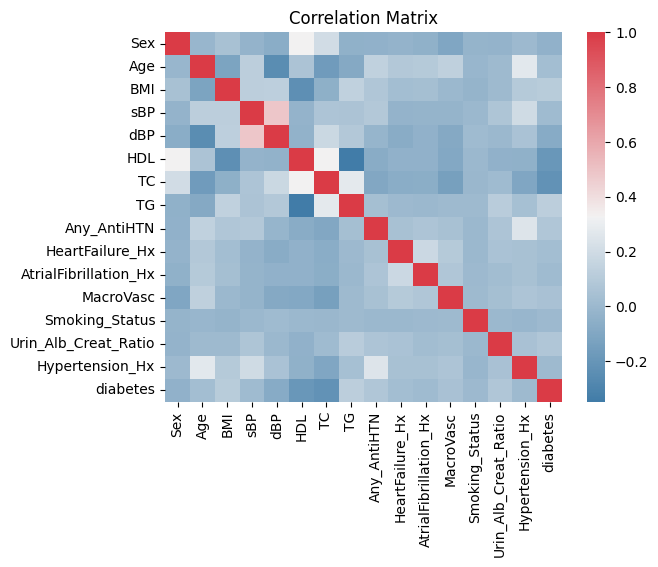

In [ ]:
# cleaned dataset name
# median imputer: CHANGE_medianImpute
# delete NA: CHANGE_noNA

# correlation plot on cleaned dataset
plt.title('Correlation Matrix')
Mcorr = CHANGE_noNA.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

######################################### export cleaned datasets for later analysis
CHANGE_noNA.to_csv("CHANGE_noNA.csv", index=False)
CHANGE_medianImpute.to_csv("CHANGE_medianImpute.csv", index=False)

# transform the HBA1C column to 1 for HBA1C>=6.5, 0 for HBA1C<6.5 in the selected dataset
def funDiabetes(row):
    if row['HBA1C'] < 6.5 and row['HBA1C'] >= 0:
        return 0
    elif row['HBA1C'] >= 6.5:
        return 1
    else:
        pass
CHANGE_selected['diabetes'] = CHANGE_selected.apply(funDiabetes, axis=1)
# drop HBA1C
CHANGE_selected = CHANGE_selected.drop(columns=['HBA1C'])

# export
CHANGE_selected.to_csv("CHANGE_selected.csv", index=False)


# Apply the K-Means Method
Using data with removed missing values. Dataset name: CHANGE_noNA

In [ ]:
# Import necessary libraries for K-Fold Cross-Validation for K-means
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
import numpy as np

# Features for clustering
X = CHANGE_noNA.drop(['MacroVasc'], axis = 1)

# Range of K values to test
k_values = range(2, 7)

# Number of folds for K-Fold Cross-Validation
n_folds = 5

# Initialize a list to store evaluation metrics
scores = []

# Iterate through K values and perform Cross-Validation
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
  fold_scores = []
  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)

# Calculate a clustering quality metric (using Silhouette Score)
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test, labels)
fold_scores.append(score)
mean_score = np.mean(fold_scores)
scores.append(mean_score)

# Choose the best K value
best_k = k_values[np.argmax(scores)]
print(f"The best K value is {best_k}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The best K value is 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



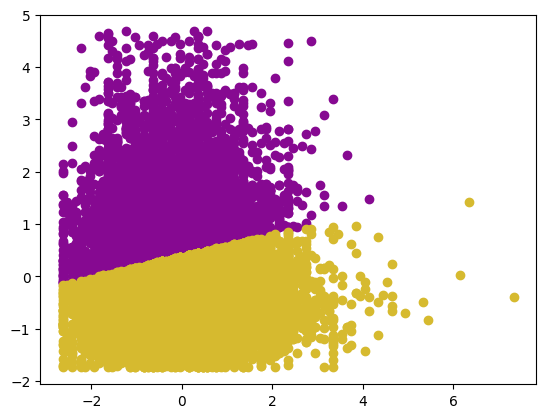

In [ ]:
# Required libraries for K-means Implementation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose features for clustering and visualization
features = ['Sex','Age','BMI','sBP','dBP','HDL','TC','TG','diabetes',
              'Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx','Smoking_Status',
              'Urin_Alb_Creat_Ratio','Hypertension_Hx']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
# Choose any two features we are interested in from the list of features for clustering
data = CHANGE_noNA[['dBP','HDL']].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
# Use the best k value 2
kmeans = KMeans(n_clusters=2, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



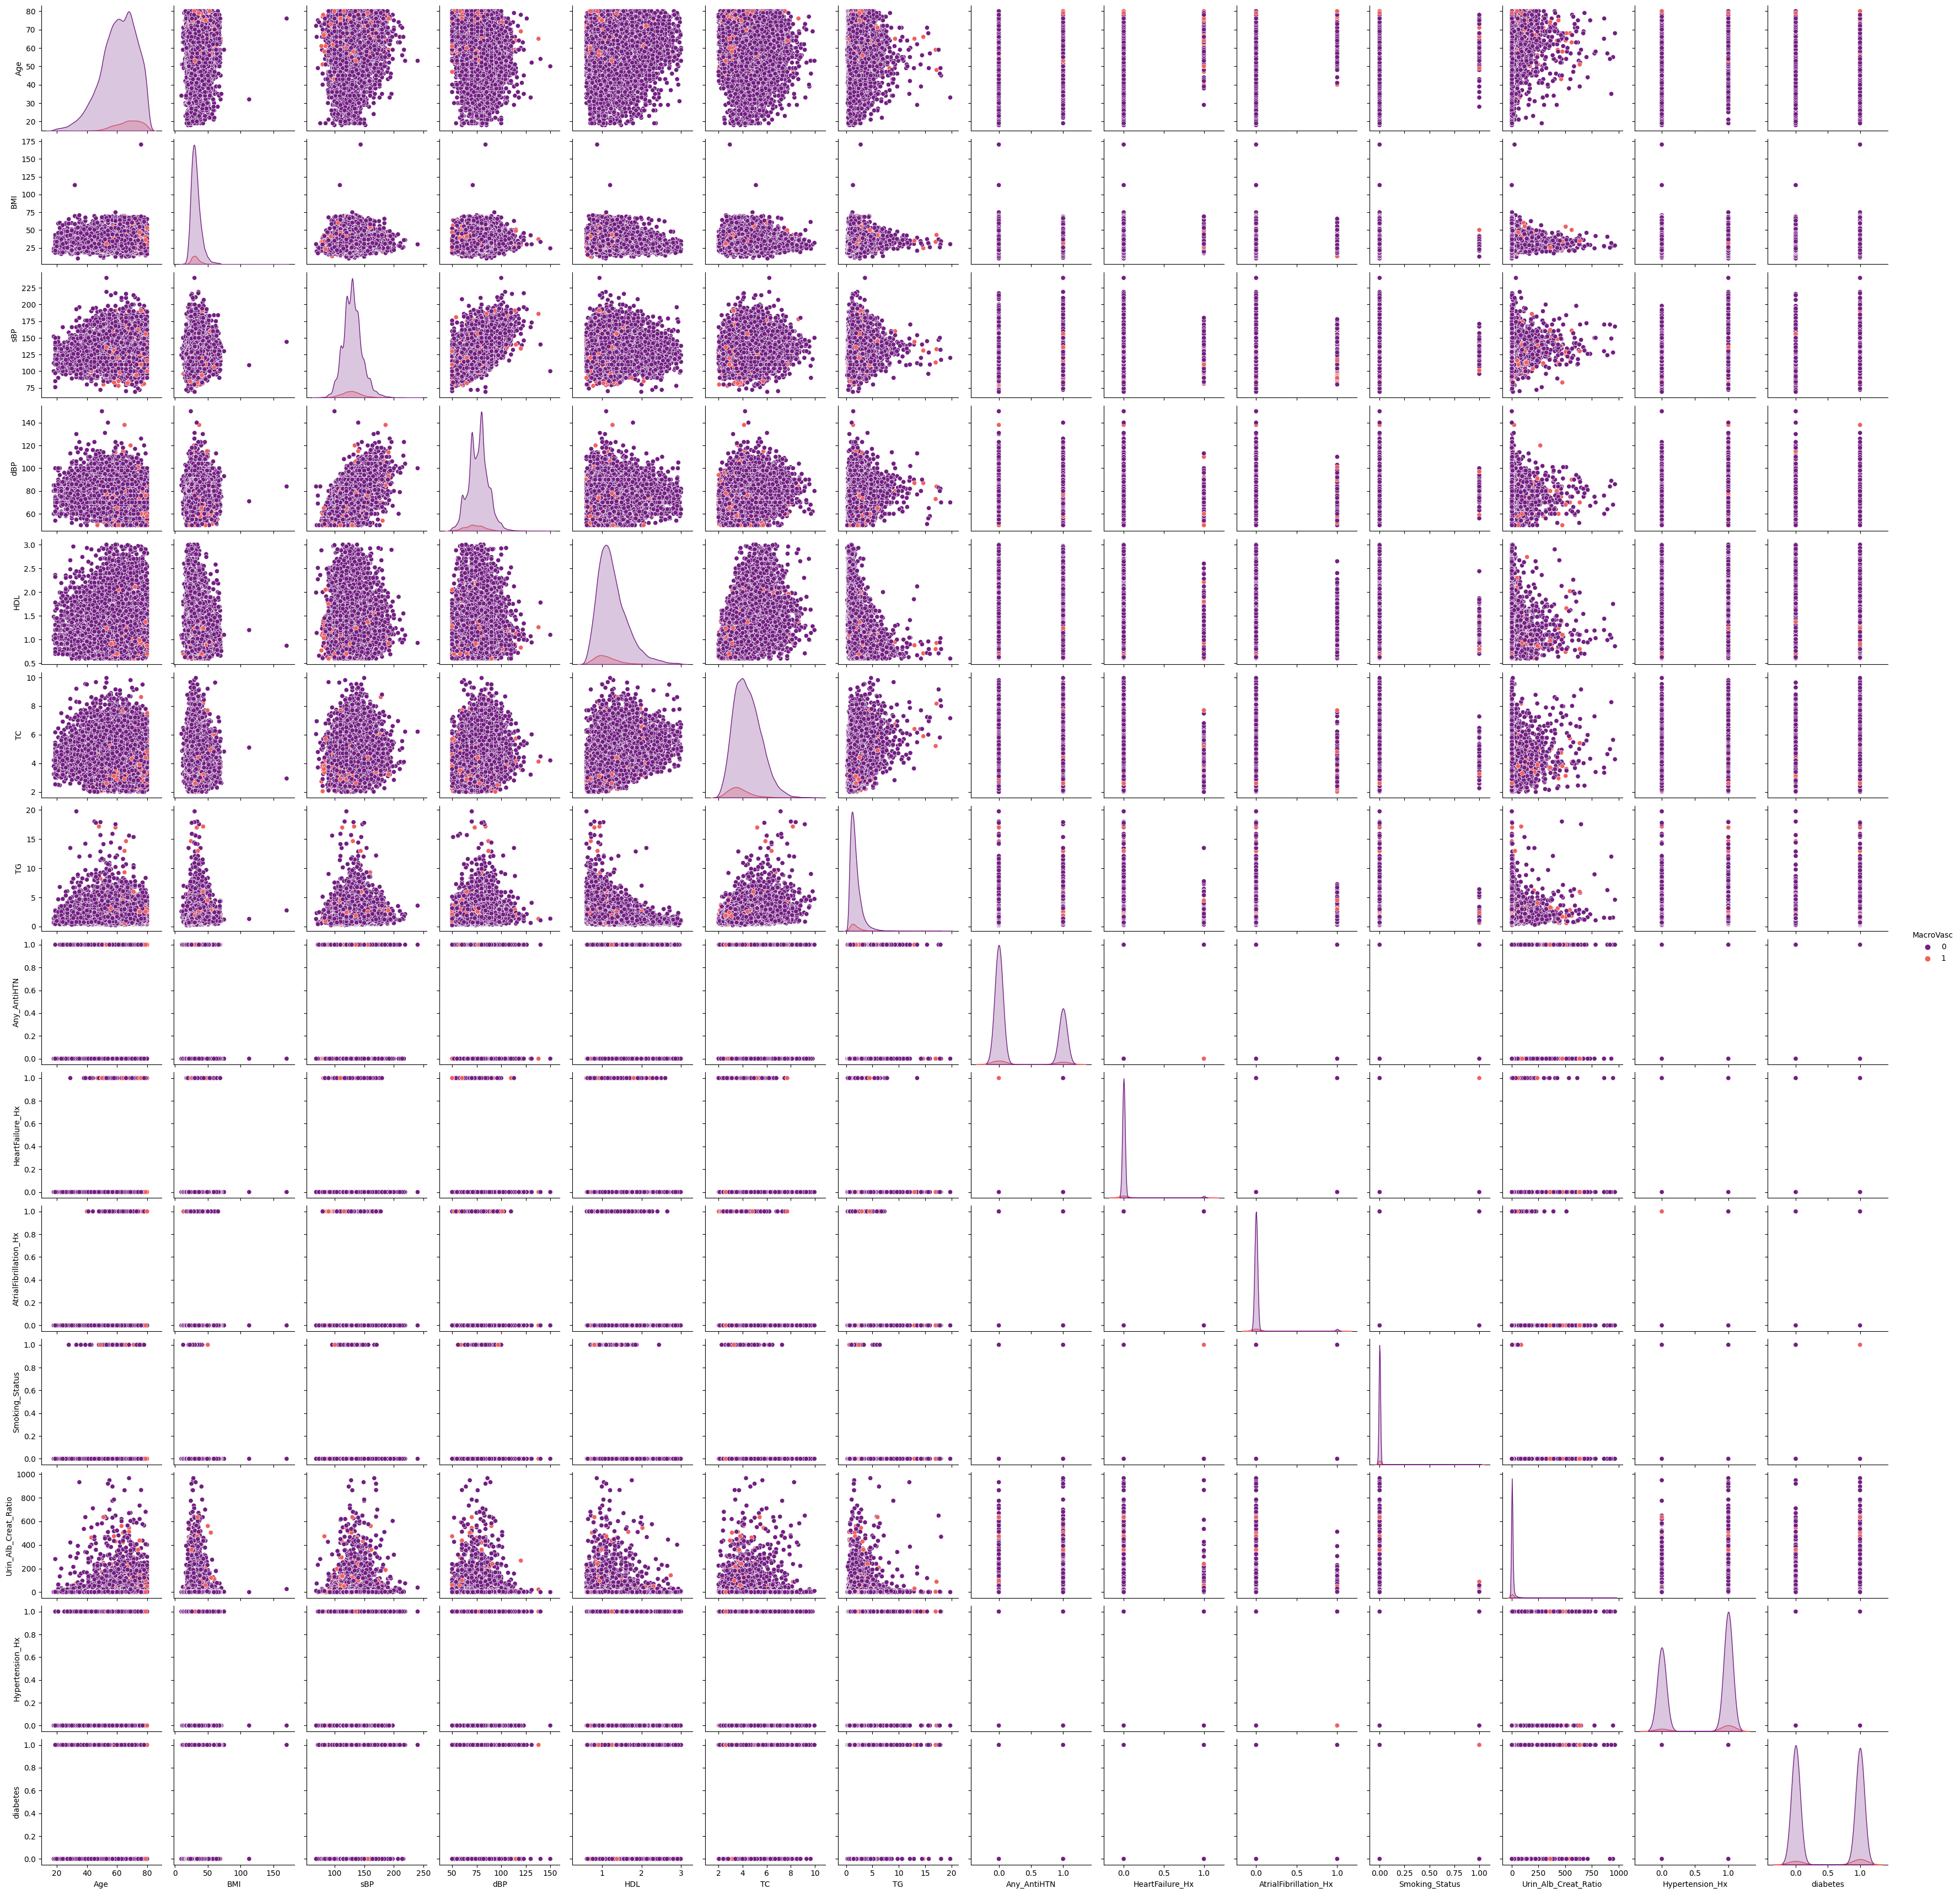

In [ ]:
# Display pair plot for data visualization
sns.pairplot(CHANGE_noNA.iloc[:,1:len(CHANGE_noNA.columns)], hue='MacroVasc', palette='magma')
plt.show()


# Apply the Logistic Regression (Method 1)
Using data with removed missing values. Dataset name: CHANGE_noNA

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Store the explanatory and target features
# X = CHANGE_noNA.drop('MacroVasc', axis = 1)
# y = CHANGE_noNA['MacroVasc']

X = CHANGE_medianImpute.drop('MacroVasc', axis = 1)
y = CHANGE_medianImpute['MacroVasc']

# # Normalizing data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Number of folds for cross-validation and define kfold
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation and obtain the accuracy scores for each fold
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LogisticRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)

  print(f'Fold Accuracy: {accuracy}')



In [ ]:
# Tomelinks Undersampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_resampled, y_resampled)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
# X = CHANGE_noNA.drop('MacroVasc', axis = 1)
# y = CHANGE_noNA['MacroVasc']

X = CHANGE_medianImpute.drop('MacroVasc', axis = 1)
y = CHANGE_medianImpute['MacroVasc']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

# Exploration of the Features

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(4, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

# select_col = CHANGE_noNA.columns[0:11].append(CHANGE_noNA.columns[12:16])
select_col = CHANGE_medianImpute.columns[0:11].append(CHANGE_medianImpute.columns[12:16])

for i, feature in enumerate(select_col):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    # X_plot = CHANGE_noNA[[feature]]
    # y_plot = CHANGE_noNA['MacroVasc']
    X_plot = CHANGE_medianImpute[[feature]]
    y_plot = CHANGE_medianImpute['MacroVasc']

    # Fit logistic regression model
    log_reg.fit(X_plot, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X_plot.min(), X_plot.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X_plot,  y_plot, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

# Apply the Logistic Regression (Method 2)
Using data with removed missing values. Dataset name: CHANGE_noNA

In [ ]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Store the explanatory and target features
# X = CHANGE_noNA.drop('MacroVasc', axis = 1)
# y = CHANGE_noNA['MacroVasc']
X = CHANGE_medianImpute.drop('MacroVasc', axis = 1)
y = CHANGE_medianImpute['MacroVasc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Tomelinks Undersampling
from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
X_train, y_train = t1.fit_resample(X_train, y_train)

# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_train, y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
# which columns used and which wasn't
rfecv.support_


In [ ]:
# features ranking low is better
rfecv.ranking_


In [ ]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()


In [ ]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


In [ ]:
selected_columns = X_train.columns[rfecv.support_]

# Select only the features that were chosen by RFECV
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()